# QuanEstimation : single parameter estimation

We consider a system whose Hamiltonian is $H = \frac{1}{2}\omega_0 \sigma_z$, where $\sigma_z$ is a Pauli matrix.

The dynamics of the system is governed by
$\partial_t\rho=-i[H, \rho]+ \frac{\gamma}{2}(\sigma_z\rho\sigma_z-\rho)$.

Preparing the probe state at $|+\rangle$.

$\textbf{References}$

[1] J. Liu and H. Yuan, Phys. Rev. A $\textbf{96}$, 012227 (2017).

Use trained data (by GRAPE) to plot QFI-t figure.

In [7]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as scylin
from time import time
import os
from datetime import datetime

#from AsymptoticBound.CramerRao import CramerRao
#from Dynamics.dynamics import Lindblad
from Control.GRAPE import GRAPE
#from Control.GRAPE_without_adam import GRAPE_without_adam
from Common.common import mat_vec_convert,  dRHO

omega0 = 1.0
gamma = [0.05]
T = 5.0
tnum = 2500
tspan = np.linspace(0, T, tnum)
dt = tspan[1]-tspan[0]
cnum = tnum
vx = 0.5*np.ones(cnum)
vy = 0.5*np.ones(cnum)
vz = 0.5*np.ones(cnum)

sx = np.array([[0.+0.j, 1.+0.j],[1.+0.j, 0.+0.j]])  
sy = np.array([[0.+0.j, 0.-1.j],[0.+1.j, 0.+0.j]]) 
sz = np.array([[1.+0.j, 0.+0.j],[0.+0.j, -1.+0.j]])
sp, sm = 0.5*(sx+1.j*sy), 0.5*(sx-1.j*sy)

#initial state
psi0 = np.array([[1.+0.j],[0.+0.j]])
psi1 = np.array([[0.+0.j],[1.+0.j]])
psi_p = (psi0+psi1)/np.sqrt(2)
psi_m = (psi0-psi1)/np.sqrt(2)
rho0 = np.dot(psi_p, psi_p.conj().T)
dim = len(rho0)

#time independent Hamiltonian
H0 = 0.5*omega0*sz
dH0 = [0.5*sz]

#control Hamiltonian
Hc_ctrl = [sx,sy,sz]
Hc_coeff = [vx,vy,vz]

#measurement
M1 = np.dot(psi_p, psi_p.conj().transpose())
M2 = np.dot(psi_m, psi_m.conj().transpose())
M  = [M1, M2]

CRB = CramerRao()

Lvec = [sz]
GRAPE = GRAPE(tspan, rho0, H0, Hc_ctrl, dH0, Hc_coeff, Lvec, gamma)
#GRAPE = GRAPE_without_adam(tspan, rho0, H0, Hc_ctrl, dH0, Hc_coeff, Lvec, gamma)
episode = 100
save_num = 1

#==========================================================
# dayTime = datetime.now().date().strftime('%Y%m%d')
# path = str(dayTime)+'test_GRAPE'

# isexists=os.path.exists(path)
# if not isexists:
#     os.makedirs(path)
# if os.path.exists('./'+path+'/'+'vx_ctrl.txt'):
#     os.remove('./'+path+'/'+'vx_ctrl.txt')
# if os.path.exists('./'+path+'/'+'vy_ctrl.txt'):
#     os.remove('./'+path+'/'+'vy_ctrl.txt')
# if os.path.exists('./'+path+'/'+'vz_ctrl.txt'):
#     os.remove('./'+path+'/'+'vz_ctrl.txt')
#==========================================================
t1 = time()
for round_i in range(episode):
    GRAPE.GRAPE_QFI()
    # fvx = open('./'+path+'/'+'vx_ctrl.txt','a')
    # fvx.write('\n')
    # np.savetxt(fvx, np.array(GRAPE.control_coeff_total[0]).T)
    # fvx.close()
        
    # fvy = open('./'+path+'/'+'vy_ctrl.txt','a')
    # fvy.write('\n')
    # np.savetxt(fvy, np.array(GRAPE.control_coeff_total[1]).T)
    # fvy.close()
        
    # fvz = open('./'+path+'/'+'vz_ctrl.txt','a')
    # fvz.write('\n')
    # np.savetxt(fvz, np.array(GRAPE.control_coeff_total[2]).T)
    # fvz.close()
        
    f = GRAPE.Ffinal
    print(round_i,f)
    t2 = time()
    #print(t2-t1)


JuliaError: Exception 'UndefVarError' occurred while calling julia code:
PyCall.PyObject

In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt

from AsymptoticBound.CramerRao import CramerRao
from Dynamics.dynamics import Lindblad
from Common.common import mat_vec_convert

#VX_ = np.loadtxt('./'+'compare_adam'+'/'+'20210310test_GRAPE'+'/'+'vx_ctrl.txt')
#VY_ = np.loadtxt('./'+'compare_adam'+'/'+'20210310test_GRAPE'+'/'+'vy_ctrl.txt')
#VZ_ = np.loadtxt('./'+'compare_adam'+'/'+'20210310test_GRAPE'+'/'+'vz_ctrl.txt')

VX_ = np.loadtxt('./'+'compare_adam'+'/'+'20210310test_adam'+'/'+'vx_ctrl.txt')
VY_ = np.loadtxt('./'+'compare_adam'+'/'+'20210310test_adam'+'/'+'vy_ctrl.txt')
VZ_ = np.loadtxt('./'+'compare_adam'+'/'+'20210310test_adam'+'/'+'vz_ctrl.txt')

omega0 = 1.0
gamma = [0.05]
T = 5
tnum = 2500
tspan = np.linspace(0,T, tnum)
dt = tspan[1]-tspan[0]

sx = np.array([[0.+0.j, 1.+0.j],[1.+0.j, 0.+0.j]])  
sy = np.array([[0.+0.j, 0.-1.j],[0.+1.j, 0.+0.j]]) 
sz = np.array([[1.+0.j, 0.+0.j],[0.+0.j, -1.+0.j]])
sp, sm = 0.5*(sx+1j*sy), 0.5*(sx-1j*sy)

#initial state
psi0 = np.array([[1.+0.j],[0.+0.j]])
psi1 = np.array([[0.+0.j],[1.+0.j]])
psi_p = (psi0+psi1)/np.sqrt(2)
psi_m = (psi0-psi1)/np.sqrt(2)
rho0 = np.dot(psi_p, psi_p.conj().T)
dim = len(rho0)

#measurement
M1 = np.dot(psi_p, psi_p.conj().transpose())
M2 = np.dot(psi_m, psi_m.conj().transpose())
M  = [M1, M2]

#time independent Hamiltonian
H0 = 0.5*omega0*sz
dH = [0.5*sz]
Liouville_operator = [sz]
H_ctrl = [sx,sy,sz]

CRB = CramerRao()

index = [50]
qfi_round = []
for num in index:
    vx = VX_[num*tnum:(num+1)*tnum]
    vy = VY_[num*tnum:(num+1)*tnum]
    vz = VZ_[num*tnum:(num+1)*tnum]
    Hc_coeff = [vx,vy,vz]
    dynamics = Lindblad(tspan, rho0, H0, H_ctrl, dH, Hc_coeff, Liouville_operator, gamma, control_option=True)
    dynamics.data_generation()
    rho =  dynamics.rho
    drho = dynamics.rho_derivative
    qfi = []
    for ti in range(tnum):
        rho_ = mat_vec_convert(rho[ti])
        drho_tp = mat_vec_convert(drho[ti][0])
        drho_ = [drho_tp]
        F_q = CRB.QFIM(rho_, drho_)
        qfi.append(F_q)
    qfi_round.append(qfi)


FileNotFoundError: [WinError 2] 系统找不到指定的文件。

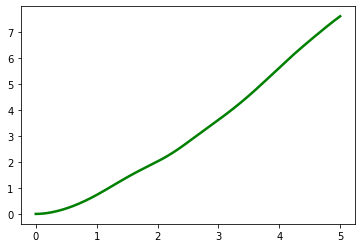

In [35]:
plt.plot(tspan, qfi_round[0], 'g-', linewidth=2.5, label='QFI')

In [37]:
np.save('qfi_50_adam',qfi_round[0])

In [1]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt

T = 5
tnum = 2500
tspan = np.linspace(0,T, tnum)

qfi_350 = np.load('./'+'compare_adam'+'/'+'qfi_1000.npy')
qfi_350_adam = np.load('./'+'compare_adam'+'/'+'qfi_350_adam.npy')

plt.plot(tspan, qfi_350, 'g--', linewidth=2.5, label='QFI ')
plt.plot(tspan, qfi_350_adam, 'r-', linewidth=2.5, label='QFI (adam)')
plt.xlabel('$t$',fontsize=20)
plt.axis([0, 5., 0, 10])
plt.xticks([0,1,2,3,4,5],fontsize=15)
plt.yticks([0,5,10],fontsize=15)
plt.legend(bbox_to_anchor = [0.8, 1.0], frameon=False,fontsize=15)

plt.show()  

FileNotFoundError: [Errno 2] No such file or directory: './compare_adam/qfi_1000.npy'

In [5]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
from scipy import linalg as scylin
from time import time
import os
from datetime import datetime

#from Dynamics.dynamics import Lindblad
from Dynamics.analytical_GRAPE import ana_GRAPE
#from Control.GRAPE_without_adam import GRAPE_without_adam
from Common.common import mat_vec_convert,  dRHO

omega0 = 1.0
gamma = [0.05]
T = 5.0
tnum = 2500
tspan = np.linspace(0, T, tnum)
dt = tspan[1]-tspan[0]
cnum = tnum
vx = 0.5*np.ones(cnum)
vy = 0.5*np.ones(cnum)
vz = 0.5*np.ones(cnum)

sx = np.array([[0.+0.j, 1.+0.j],[1.+0.j, 0.+0.j]])  
sy = np.array([[0.+0.j, 0.-1.j],[0.+1.j, 0.+0.j]]) 
sz = np.array([[1.+0.j, 0.+0.j],[0.+0.j, -1.+0.j]])
sp, sm = 0.5*(sx+1.j*sy), 0.5*(sx-1.j*sy)

#initial state
psi0 = np.array([[1.+0.j],[0.+0.j]])
psi1 = np.array([[0.+0.j],[1.+0.j]])
psi_p = (psi0+psi1)/np.sqrt(2)
psi_m = (psi0-psi1)/np.sqrt(2)
rho0 = np.dot(psi_p, psi_p.conj().T)
dim = len(rho0)

#time independent Hamiltonian
H0 = 0.5*omega0*sz
dH0 = [0.5*sz]

#control Hamiltonian
Hc_ctrl = [sx,sy,sz]
Hc_coeff = [vx,vy,vz]

#measurement
M1 = np.dot(psi_p, psi_p.conj().transpose())
M2 = np.dot(psi_m, psi_m.conj().transpose())
M  = [M1, M2]

CRB = CramerRao()

Lvec = [sz]

GRAPE = ana_GRAPE(tspan, rho0, H0, Hc_ctrl, dH0, Hc_coeff, Lvec, gamma)
#GRAPE = GRAPE_without_adam(tspan, rho0, H0, Hc_ctrl, dH0, Hc_coeff, Lvec, gamma)
episode = 100
save_num = 1

#==========================================================
# dayTime = datetime.now().date().strftime('%Y%m%d')
# path = str(dayTime)+'test_GRAPE'

# isexists=os.path.exists(path)
# if not isexists:
#     #os.makedirs(path)
# if os.path.exists('./'+path+'/'+'vx_ctrl.txt'):
#     #os.remove('./'+path+'/'+'vx_ctrl.txt')
# if os.path.exists('./'+path+'/'+'vy_ctrl.txt'):
#     #os.remove('./'+path+'/'+'vy_ctrl.txt')
# if os.path.exists('./'+path+'/'+'vz_ctrl.txt'):
#     #os.remove('./'+path+'/'+'vz_ctrl.txt')
#==========================================================
t1 = time()
for round_i in range(episode):
    GRAPE.GRAPE_QFI()
    # fvx = open('./'+path+'/'+'vx_ctrl.txt','a')
    # fvx.write('\n')
    # np.savetxt(fvx, np.array(GRAPE.control_coeff_total[0]).T)
    # fvx.close()
        
    # fvy = open('./'+path+'/'+'vy_ctrl.txt','a')
    # fvy.write('\n')
    # np.savetxt(fvy, np.array(GRAPE.control_coeff_total[1]).T)
    # fvy.close()
        
    # fvz = open('./'+path+'/'+'vz_ctrl.txt','a')
    # fvz.write('\n')
    # np.savetxt(fvz, np.array(GRAPE.control_coeff_total[2]).T)
    # fvz.close()
        
    f = GRAPE.Ffinal
    print(round_i,f)
    t2 = time()
    #print(t2-t1)


JuliaError: Exception 'UndefVarError' occurred while calling julia code:
PyCall.PyObject